In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
episode = 3200
run = '19-35-22_09-19'
folder = './data/'+ run
file_name = folder+ '/episode_'+ str(episode)+ '.npz'

In [130]:
data = np.load(file_name)
V = data['arr_0']
trj = data['arr_1']
tar = data['arr_2']



In [131]:
def scale(x):
    #
    xmin = np.floor(np.min(x)*5.)/5.
    xmax = np.ceil(np.max(x)*5.)/5.
    
    xinterval = xmax -xmin
    
    xmin_c = xmin- 0.001* xinterval
    xmax_c = xmax+ 0.001* xinterval

    return (xmin, xmax, xmin_c, xmax_c)

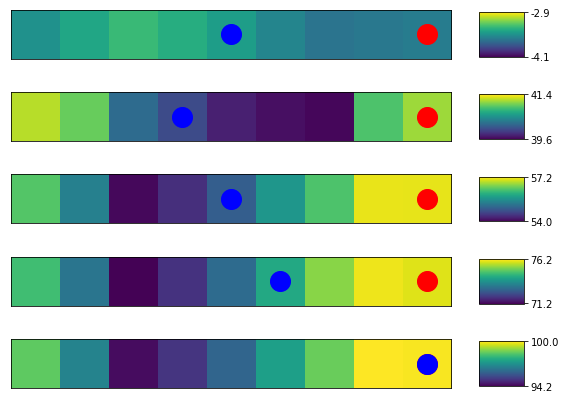

In [137]:
#
fig, ax = plt.subplots(figsize=[8, 6], nrows=5)

(c_low_cb, c_high_cb, c_low_lim, c_high_lim) = scale(V[0])
im = ax[0].imshow(V[0].reshape(1,-1), vmin=c_low_lim, vmax=c_high_lim)
ax[0].plot(tar, 0, 'ro', markersize=20)
pos = np.argmax(trj[0])
ax[0].plot(pos, 0., 'bo', markersize=20)  # imshow makes y-axis pointing downwards
ax[0].set_xticks([])
ax[0].set_yticks([])
im.set_clim(c_low_lim-0.3, c_high_lim+0.3)
cb = fig.colorbar(im, ax=ax[0], shrink=0.55, orientation="vertical", pad=0.05, aspect=1, format='%.1f')
cb.set_ticks([c_low_cb-0.3, c_high_cb+0.3])

for s in range(1,4):
    (c_low_cb, c_high_cb, c_low_lim, c_high_lim) = scale(V[s])
    
    im = ax[s].imshow(V[s].reshape(1,-1), vmin=c_low_lim, vmax=c_high_lim)
    ax[s].plot(tar, 0, 'ro', markersize=20)
    pos = np.argmax(trj[s])
    ax[s].plot(pos, 0., 'bo', markersize=20)  # imshow makes y-axis pointing downwards
    ax[s].set_xticks([])
    ax[s].set_yticks([])
    im.set_clim(c_low_lim, c_high_lim)
    cb = fig.colorbar(im, ax=ax[s], shrink=0.55, orientation="vertical", pad=0.05, aspect=1, format='%.1f')
    cb.set_ticks([c_low_cb, c_high_cb])

(c_low_cb, c_high_cb, c_low_lim, c_high_lim) = scale(V[7])
im = ax[4].imshow(V[7].reshape(1, -1), vmin=c_low_lim, vmax=c_high_lim)
ax[4].plot(tar, 0, 'ro', markersize=20)
pos = np.argmax(trj[7])
ax[4].plot(pos, 0., 'bo', markersize=20)  # imshow makes y-axis pointing downwards
ax[4].set_xticks([])
ax[4].set_yticks([])
im.set_clim(c_low_lim, c_high_lim)
cb = fig.colorbar(im, ax=ax[4], shrink=0.55, orientation="vertical", pad=0.05, aspect=1, format='%.1f')
cb.set_ticks([c_low_cb, c_high_cb])

plt.tight_layout()
plt.savefig('./figures_paper/'+run+ 'episode_'+ str(episode))
plt.show()